In [ ]:
! pip install tensorflow numpy mnist

Source : 
https://victorzhou.com/blog/keras-cnn-tutorial/
https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/


In [ ]:
import numpy as np
import mnist
from tensorflow import keras
import tensorflow as tf
import cv2 as cv

In [ ]:
mnist = keras.datasets.mnist
(train_images_1, train_labels_1), (test_images, test_labels)  = mnist.load_data()

train_images = train_images_1[:50000]
train_labels = train_labels_1[:50000]
validation_images = train_images_1[50000:]
validation_labels = train_labels_1[50000:]

# Normalize the images.
train_images = (train_images / 255) - 0.5
validation_images = (validation_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
validation_images = np.expand_dims(validation_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(validation_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)
print(test_labels.shape)
print(validation_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

model_1 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(100, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

In [ ]:
 model_1.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

""" 
model_1.fit(
  train_images,
  to_categorical(train_labels),
  epochs= 5,
  validation_data=(validation_images, to_categorical(validation_labels)),
)
"""

' \nmodel_1.fit(\n train_images,\n to_categorical(train_labels),\n epochs= 5,\n validation_data=(validation_images, to_categorical(validation_labels)),\n)\n'

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)
  
history = model_1.fit(train_images, to_categorical(train_labels), 
                    epochs = 20, validation_data =(validation_images, to_categorical(validation_labels)), 
                    callbacks =[earlystopping])

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6250 - accuracy: 0.8414 - val_loss: 0.1578 - val_accuracy: 0.9561
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1423 - accuracy: 0.9594 - val_loss: 0.1035 - val_accuracy: 0.9711
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0868 - accuracy: 0.9753 - val_loss: 0.0789 - val_accuracy: 0.9787
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0621 - accuracy: 0.9836 - val_loss: 0.0678 - val_accuracy: 0.9803
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0449 - accuracy: 0.9890 - val_loss: 0.0626 - val_accuracy: 0.9815
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0323 - accuracy: 0.9923 - val_loss: 0.0619 - val_accuracy: 0.9813
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0259 - accuracy: 0.9939 - val_loss: 0.0619 -

In [ ]:
model_1.summary()
model_1.save("/content/drive/MyDrive/Translated_Rotated_6_4_21/model_1")
#model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Translated_Rotated_6_4_21/model_1")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               135300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Translated_Rotated_6_4_21/model_1/assets


In [ ]:
#Testing
from sklearn import metrics
predictions_1 = model_1.predict(test_images)
predictions = np.argmax(predictions_1, axis=1)
print(metrics.accuracy_score(test_labels, predictions)*100)

98.26


In [ ]:
#######################################################################################################################
####################Testing on Rotated and Translated Test Data #######################################################
#######################################################################################################################

In [ ]:
test_images_1 = test_images[:3000]

def translated_data(images = test_images_1, x = 6, y = 3):
    translated_data = np.zeros((np.shape(images)[0],28,28))
    M = np.float32([[1,0,x],[0,1,y]])
    for i in range(0,np.shape(images)[0]):
        translated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return translated_data

angle =[10,20,30,-10,-20,-30]

def rotate_data(images = test_images_1, angle = 30):
    rotated_data = np.zeros((np.shape(images)[0],28,28))
    M = cv.getRotationMatrix2D((14,14),angle,1)
    for i in range(0,np.shape(images)[0]):
        rotated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return rotated_data

In [ ]:
translateddata = np.zeros((4,3000,28,28))
translateddata[0] = translated_data(x = 6, y = 3)
translateddata[1] = translated_data(x = 6, y = -3)
translateddata[2] = translated_data(x = -6, y = 3)
translateddata[3] = translated_data(x = -6, y = -3)

In [ ]:
rotateddata = np.zeros((6,3000,28,28))
for i in range(0,6):
    rotateddata[i] = rotate_data(angle = angle[i])

In [ ]:
t = [[6,3],[6,-3],[-6,-3], [-6,-3]]
for i in range(0,4):
  predictions_1 = model_1.predict(np.expand_dims(translateddata[i,:,:], axis = 3))
  predictions = np.argmax(predictions_1, axis=1)
  print("Translated by",t[i]," : ",metrics.accuracy_score(test_labels[:3000], predictions)*100)

Translated by [6, 3]  :  9.8
Translated by [6, -3]  :  16.1
Translated by [-6, -3]  :  9.0
Translated by [-6, -3]  :  14.233333333333334


In [ ]:
t2 = [[1,1],[1,-1],[-1,1],[-1,-1]]
translateddata = np.zeros((4,3000,28,28))
translateddata[0] = translated_data(x = 1, y = 1)
translateddata[1] = translated_data(x = 1,  y = -1)
translateddata[2] = translated_data(x = -1, y = 1)
translateddata[3] = translated_data(x = -1, y = -1)

In [ ]:
for i in range(0,4):
  predictions_1 = model_1.predict(np.expand_dims(translateddata[i,:,:], axis = 3))
  predictions = np.argmax(predictions_1, axis=1)
  print("Translated", t2[i]," : ",metrics.accuracy_score(test_labels[:3000], predictions)*100)

Translated [1, 1]  :  89.86666666666666
Translated [1, -1]  :  91.16666666666666
Translated [-1, 1]  :  92.23333333333333
Translated [-1, -1]  :  87.8


In [ ]:
for i in range(0,6):
  predictions_1 = model_1.predict(np.expand_dims(rotateddata[i,:,:], axis = 3))
  predictions = np.argmax(predictions_1, axis=1)
  print("Rotated by ", angle[i], " :",metrics.accuracy_score(test_labels[:3000], predictions)*100)

Rotated by  10  : 93.53333333333333
Rotated by  20  : 78.36666666666666
Rotated by  30  : 56.3
Rotated by  -10  : 95.63333333333334
Rotated by  -20  : 86.73333333333333
Rotated by  -30  : 68.06666666666666


In [ ]:
#######################################################################################################################
#################### Appending Vectors from pipeline ##################################################################
#######################################################################################################################

In [ ]:
! unzip "/content/drive/My Drive/all_vect_new.zip"

In [ ]:
#Adding grayscale vectors alone
import pandas as pd
grayscale_data = pd.read_csv("grayscale_data.csv").iloc[:,1:]
conjugate_data = pd.read_csv("conjugate_data.csv").iloc[:,1:]
height_data = (pd.read_csv("height_data.csv")).iloc[:,1:]
density_data = (pd.read_csv("density_data.csv")).iloc[:,1:]
radial_data = (pd.read_csv("radial_data.csv")).iloc[:,1:]
line_data = (pd.read_csv("line_data.csv")).iloc[:,1:]
grayscale_data = (pd.read_csv("grayscale_data.csv")).iloc[:,1:]
conjugate_data = (pd.read_csv("conjugate_data.csv")).iloc[:,1:]
vr_data = (pd.read_csv("vr_data.csv")).iloc[:,1:]
#add_data = pd.concat([height_data,density_data,radial_data,line_data,grayscale_data,conjugate_data, vr_data], axis = 1)
add_data = radial_data
sh = add_data.shape[1]

In [ ]:
from sklearn.preprocessing import normalize
append_train = normalize(np.array(add_data)[:50000,:], axis=0, norm='max')
append_validation = normalize(np.array(add_data)[50000:60000,:], axis=0, norm='max')
append_test = normalize(np.array(add_data)[60000:,:], axis=0, norm='max')

In [ ]:
from keras.utils import plot_model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.models import Model

In [ ]:
#Multi input CNN
inputA = Input(shape=(sh,))
inputB = Input(shape=(28,28,1))

num_filters = 8
filter_size = 3
pool_size = 2

# first feature extractor
conv1 = Conv2D(num_filters, filter_size, input_shape=(28, 28, 1))(inputB)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

flat2 = Flatten()(inputA)
merge = concatenate([flat1, flat2])
output_1 = Dense(100, activation='sigmoid')(merge)
output = Dense(10, activation='softmax')(output_1)
model = Model(inputs = [inputA, inputB], outputs = output)

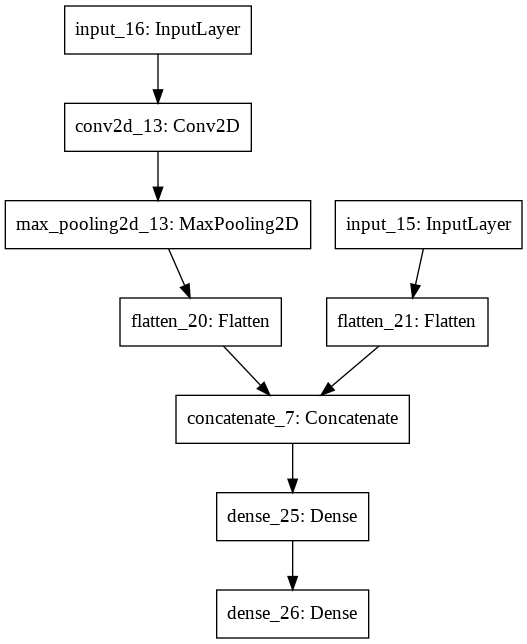

In [ ]:
plot_model(model)

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)
  
history = model.fit([append_train, train_images], to_categorical(train_labels), 
                    epochs = 20, validation_data =([append_validation, validation_images], to_categorical(validation_labels)), 
                    callbacks =[earlystopping])

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5349 - accuracy: 0.8621 - val_loss: 0.1602 - val_accuracy: 0.9557
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1482 - accuracy: 0.9548 - val_loss: 0.1063 - val_accuracy: 0.9701
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0948 - accuracy: 0.9733 - val_loss: 0.0838 - val_accuracy: 0.9768
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0669 - accuracy: 0.9816 - val_loss: 0.0723 - val_accuracy: 0.9782
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0484 - accuracy: 0.9872 - val_loss: 0.0656 - val_accuracy: 0.9807
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0358 - accuracy: 0.9914 - val_loss: 0.0674 - val_accuracy: 0.9807
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.0626 -

In [ ]:
predictions_1 = model.predict([append_test, test_images])
predictions = np.argmax(predictions_1, axis=1)
print(metrics.accuracy_score(test_labels, predictions)*100)

98.47
